In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def f(a, b):
    return a**2 + b**2

In [2]:
def gradient_descent(theta0, iters, alpha):
    history = [theta0]
    theta = theta0
    
    for i in range(iters):
        gradient = [2.0*x for x in theta]
        
        theta = [a - alpha*b for a, b in zip(theta, gradient)]
        history.append(theta)
    return history

history = gradient_descent(theta0 = [-1.8, 1.6], iters=30, alpha=0.03)

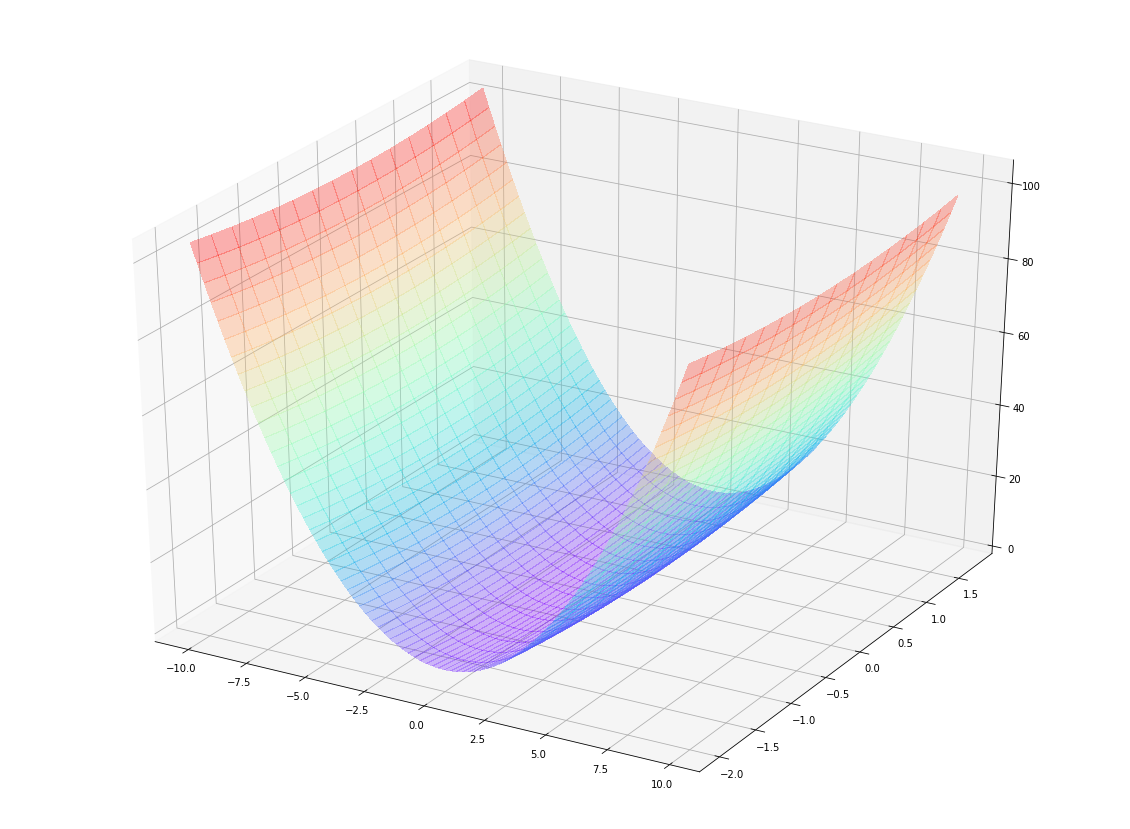

In [17]:
# f(x,y) = x^2 + y^2 함수의 그래프 그리기 
fig = plt.figure(figsize=(20, 15)) 
ax = fig.gca(projection='3d') 

a = np.arange(-10, 10, 0.25) 
b = np.arange(-2, 2, 0.25) 
a, b = np.meshgrid(a, b)
c = f(a,b) 
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False, cmap='rainbow')


[5.8        5.12488    4.52834397 4.00124473 3.53549984 3.12396766
 2.76033783 2.4390345  2.15513089 1.90427365 1.6826162  1.48675967
 1.31370085 1.16078607 1.02567057 0.90628252 0.80079123 0.70757913
 0.62521692 0.55244167 0.48813746 0.43131826 0.38111281 0.33675128
 0.29755343 0.26291821 0.23231453 0.20527312 0.18137933 0.16026678
 0.14161172]


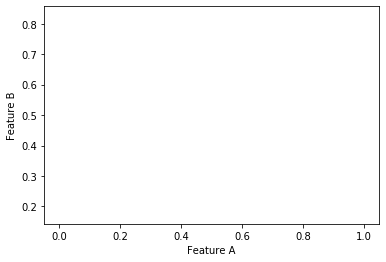

In [16]:
a = np.array([x[0] for x in history]) 
b = np.array([x[1] for x in history]) 
c = f(a,b) 

ax.scatter(a, b, c, color="r"); 
print(c) 
plt.xlabel('Feature A') 
plt.ylabel('Feature B') 
plt.axis('equal') 
plt.show()


In [10]:
# make_regression : 회귀분석용 가상 데이터 생성기
# -> 만들어진 데이터는 종속 변수 y의 값이 독립 변수 x 벡터의 선형 조합인 선형 관계
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

# 입력값
# n_samples : 정수, 표본 데이터의 갯수
# n_features : 정수, 독립 변수의 수(차원)
# n_targets : 정수, 종속 변수의 수(차원)
# noise, disturbance : 종속 변수 y에 영향을 미치는 요인들의 합(e)
# bias : x = 0일 때 y가 가질 수 있는 값(b), y 절편
# coef : 불리언, True면 선형 모형의 계수도 출력
# random_state : 정수, 난수 발생용 시드값

# y = b + W(T)x + e

# 출력값
# X : [n_samples, n_features] 형상의 2차원 배열
# y : [n_samples] 형상의 1차원 배열 또는 [n_samples, n_targets] 형상의 2차원 배열
# coef : [n_features] 형사의 1차원 배열 또는 [n_features, n_targets] 형상의 2차원 배열
# -> 선형 모형 계수 벡터 W
X0, y, coef = make_regression(n_samples=100, n_features=1,
                             bias=100, noise=10, coef=True, random_state=1)

In [232]:
coef
# 32.268, 86.447 -> y = 32.268 + 86.447X + e

array(80.71051956)

In [233]:
# 상수항 결합
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        , -0.61175641],
       [ 1.        , -0.24937038],
       [ 1.        ,  0.48851815],
       [ 1.        ,  0.76201118],
       [ 1.        ,  1.51981682]])

In [234]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression().fit(X0, y)
# print(model.coef_, model.intercept_)

In [235]:
# # predict 메소드 : Xnew 값에 대응하는 y값 예측
# Xnew = [[2.4, 0.01]]
# model.predict(Xnew)

In [236]:
X0[:5]

array([[-0.61175641],
       [-0.24937038],
       [ 0.48851815],
       [ 0.76201118],
       [ 1.51981682]])

In [237]:
X[:5]

array([[ 1.        , -0.61175641],
       [ 1.        , -0.24937038],
       [ 1.        ,  0.48851815],
       [ 1.        ,  0.76201118],
       [ 1.        ,  1.51981682]])

In [238]:
y
y.shape

(100,)

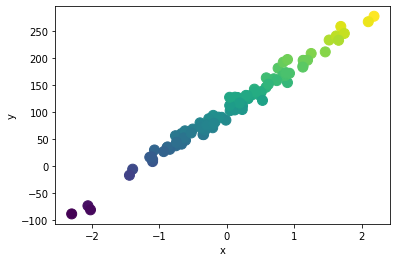

In [239]:
plt.scatter(X0, y, c=y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

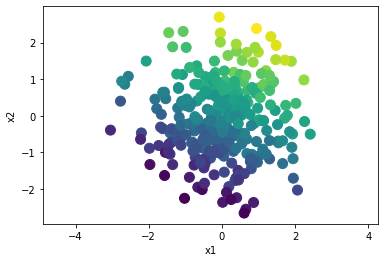

In [250]:
X, y, w = make_regression(n_samples=300, n_features=2, noise=10,
                          coef=True, random_state=0)

# n_features : 독립 변수가 2개 -> X[0], X[1]은 서로 독립 변수
# 두 독립 변수 모두 종속 변수와 상관 관계가 있는 경우
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

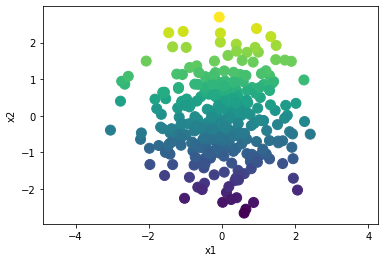

In [256]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1,
                          noise=0, coef=True, random_state=0)

# n_informative : 독립 변수 중 실제 종속 변수와  상관 관계가 있는 경우 여기선 1가지만
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

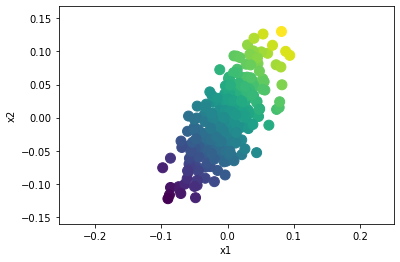

In [257]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0,
                          tail_strength=0, coef=True, random_state=0)

# tail_strenght : 독립 변수가 서로 상관관계가 있는 경우
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

# 보스턴 집값 데이터 회귀 분석

# 데이터 수집 및 탐색

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [2]:
# 보스톤 집값 데이터 회귀 분석
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston.feature_names

# CRIM: 범죄율
# INDUS: 비소매상업지역 면적 비율
# NOX: 일산화질소 농도
# RM: 주택당 방 수
# LSTAT: 인구 중 하위 계층 비율
# B: 인구 중 흑인 비율
# PTRATIO: 학생/교사 비율
# ZN: 25,000 평방피트를 초과 거주지역 비율
# CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
# AGE: 1940년 이전에 건축된 주택의 비율
# RAD: 방사형 고속도로까지의 거리
# DIS: 직업센터의 거리
# TAX: 재산세율

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
# 데이터와 타겟 데이터를 각각 판다스의 데이터프레임으로 변환
boston_df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df_target = pd.DataFrame(boston.target, columns=["MEDV"])

In [35]:
boston_df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [36]:
boston_df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
MEDV    506 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


In [37]:
boston_df_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [39]:
boston_df_target.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


# 데이터 상관관계 파악

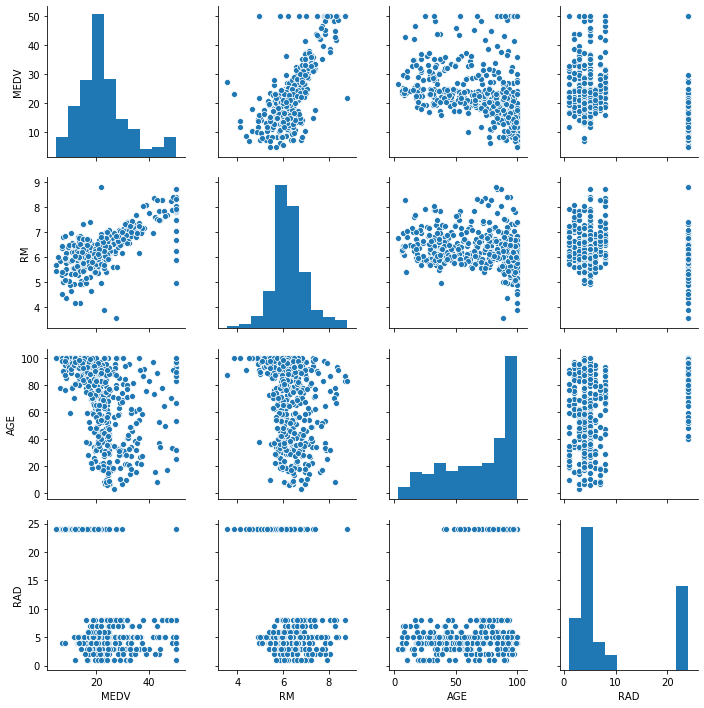

In [11]:
import seaborn as sns

# CRIM: 범죄율
# INDUS: 비소매상업지역 면적 비율
# NOX: 일산화질소 농도
# RM: 주택당 방 수
# LSTAT: 인구 중 하위 계층 비율
# B: 인구 중 흑인 비율
# PTRATIO: 학생/교사 비율
# ZN: 25,000 평방피트를 초과 거주지역 비율
# CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
# AGE: 1940년 이전에 건축된 주택의 비율
# RAD: 방사형 고속도로까지의 거리
# DIS: 직업센터의 거리
# TAX: 재산세율

# seaborn의 pairplot으로 데이터의 상관관계 파악
cols1 = ["MEDV", "RM", "AGE", "RAD"]
cols2 = ["MEDV", "CRIM", "INDUS", "NOX", "TAX"]
cols3 = ["MEDV", "LSTAT", "B", "PTRATIO"]
cols4 = ["MEDV", "ZN", "CHAS", "DIS"]
sns.pairplot(boston_df[cols1])
plt.show()

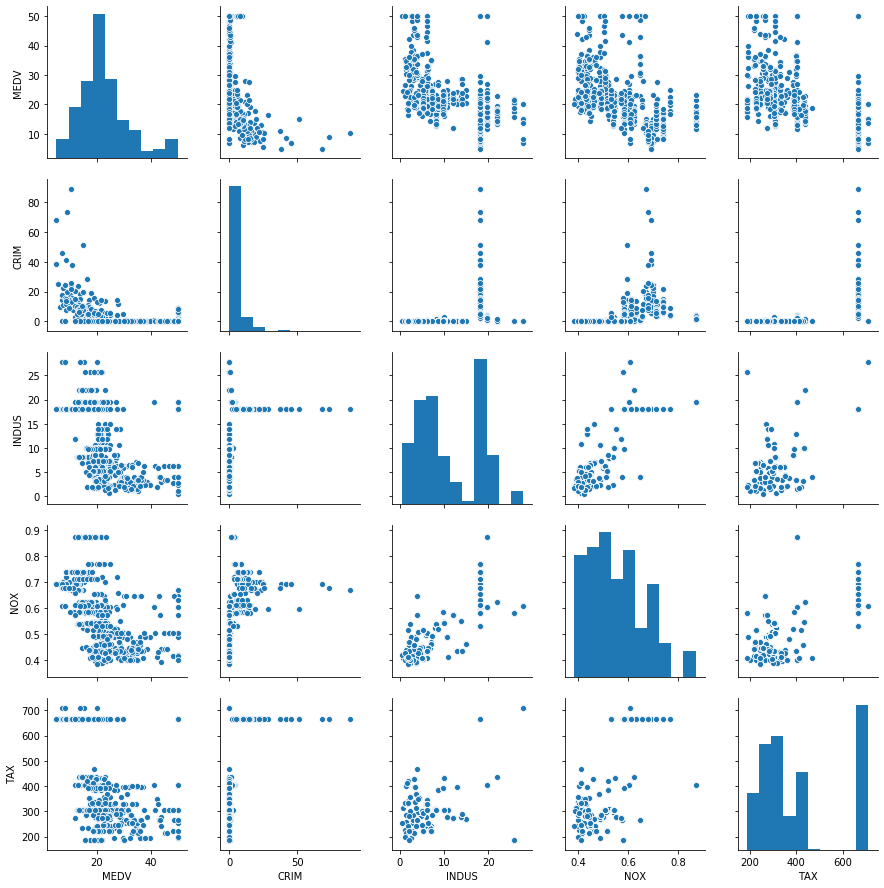

In [13]:
sns.pairplot(boston_df[cols2])
plt.show()

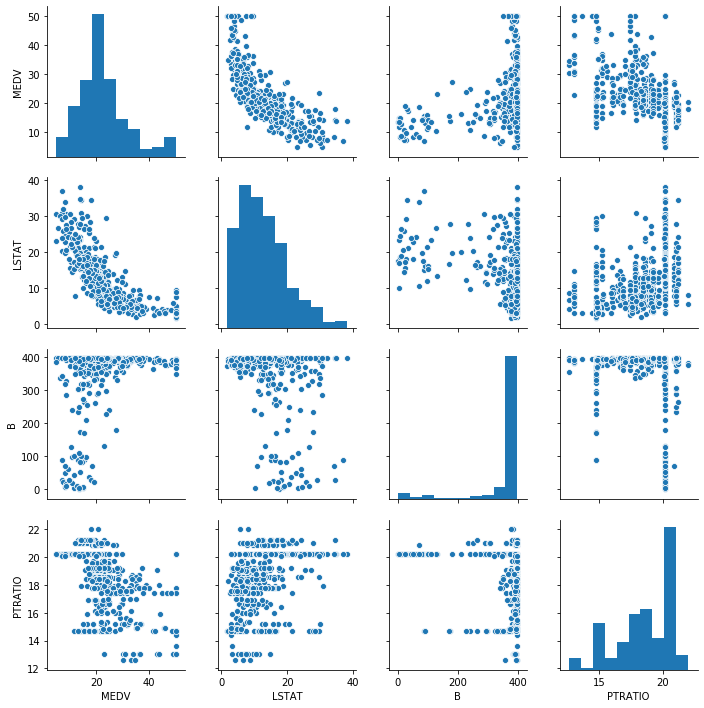

In [14]:
sns.pairplot(boston_df[cols3])
plt.show()

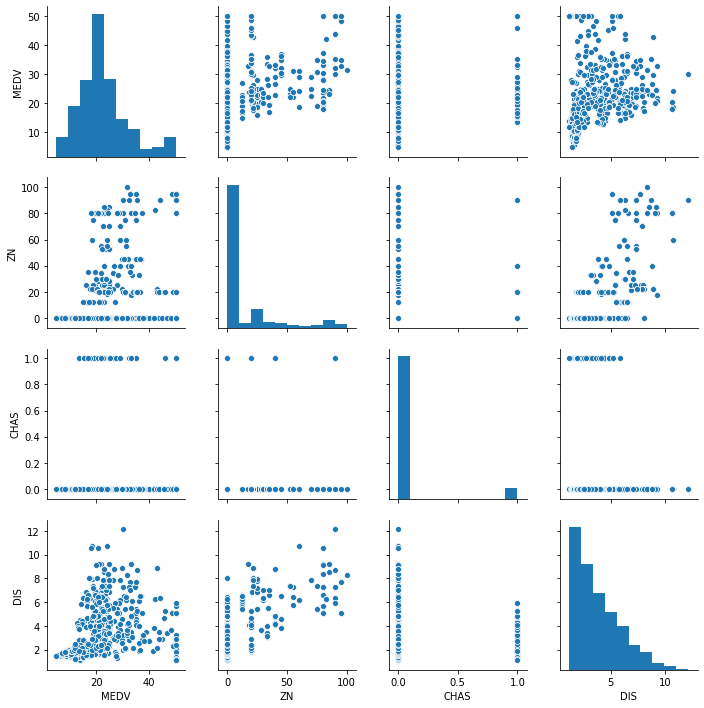

In [15]:
sns.pairplot(boston_df[cols4])
plt.show()

In [16]:
# 위의 그래프를 통해 AGE, DIS, RM, LSTAT, NOX이 그나마 상관관계가 있어보임(추측)

# 테스트 세트 만들기

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_df_data, boston_df_target, test_size=0.2, random_state=42)

In [95]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [96]:
y_train

,MEDV
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [97]:
# 타겟 데이터와 훈련 데이터와의 상관관계 확인을 위해 두 데이터를 합치기
boston_train_merge = pd.concat([X_train, y_train], axis=1)

boston_corr = boston_train_merge.corr()
boston_corr["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

In [98]:
# RM(주택당 방 수)이 증가하면 MEDV도 증가 -> 양의 상관관계
# LSTAT(인구 중 하위 계층 비율)이 증가하면 MEDV는 감소 -> 음의 상관관계 -> 부자 동네

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020812C41888>,
      dtype=object)

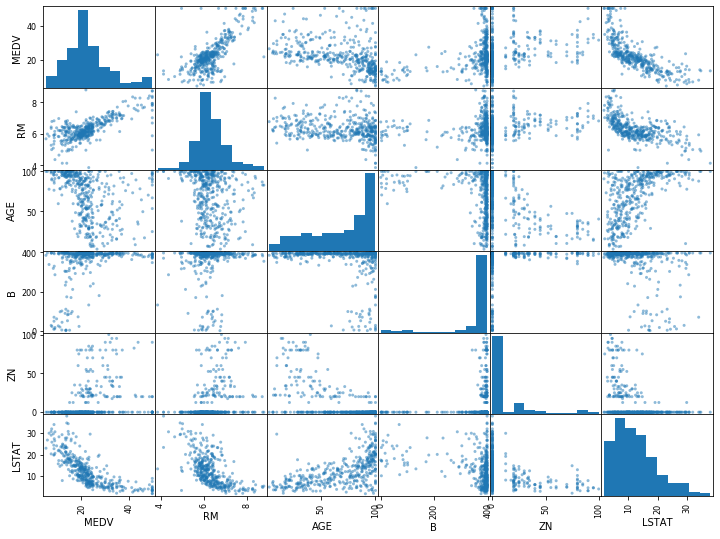

In [99]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "AGE", "B", "ZN", "LSTAT"]
scatter_matrix(train_set[attributes], figsize=(12, 9))

# 특성 스케일링

In [100]:
# 정규화는 특성마다 범위가 다르므로 이를 통일해주는 것 -> MinMaxScaler
# 표준화는 평균을 빼고 표준편차로 나누어 결과 분포의 분산이 1이 되도록 하는 것 -> StandardScaler
# 모든 변환기에서 스케일리은 전체 데이터가 아닌 훈련 데이터에 대해서만 fit() 메서드를 적용
# 그 이후 훈련 세트와 테스트 세트에 대해 transform() 메서드를 적용

In [101]:
# """
#     = 특성 선택 =
    
#     유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋음
    
#     1. 모델 기반 feature 선택
    
#         모델 기반 특성선택은 사이킷런의 SelectFromModel을 통해 구현할 수 있다.
#         SelectFromModel은 feature의 importance가 지정한 임계치보다 큰 모든 특성을 선택한다.
#         (관련 매개변수를 threshold라고 하는데, default는 'mean'이다.)

#     2. 반복적 선택
# """

In [122]:
y_origin = y_train.copy()
y_train_np = np.array(y_train).astype(int)
y_train_rav = y_train_np.ravel()

In [125]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# 선형 모델 기반 SelectFromModel
lin_selector = SelectFromModel(estimator=LogisticRegression()).fit(X_train, y_train_rav)
lin_selector.estimator_.coef_

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 8.50090059e-02, -1.54635815e-02, -1.18102897e-03,
        -2.22626820e-04, -2.21109500e-04, -4.89235196e-03,
        -3.93638427e-03, -5.19841801e-03,  1.08547822e-02,
         2.55841042e-03, -9.86772053e-03,  8.48311835e-04,
         1.27314761e-02],
       [ 1.17939457e-03, -7.89161040e-03, -1.18153824e-04,
        -1.07579571e-04, -7.98092815e-05, -2.13317126e-03,
        -2.31391098e-02, -2.53750958e-03,  5.63686386e-03,
         1.51769803e-02, -4.01241969e-03, -1.31027021e-02,
         1.37341531e-02],
       [ 2.79165007e-02, -1.20776451e-02, -2.86351407e-03,
        -3.87323181e-04, -1.40882394e-04, -4.23972798e-03,
         1.47076916e-02, -5.55500768e-03,  1.29462778e-02,
         1.18184032e-02, -7.90653620e-03, -1.61313141e-02,
         5.01443762e-02],
       [ 7.03914138e-02, -1.01920200e-02,  6.20161235e-03,
        -4.97865063e-04, -1.40606903e-05, -8.53972040e-03,
         1.35278847e-02, -5.84460382e-03, -1.23175644e-02,
         1.29867816e-02, -8.94110324e

Text(0.5, 0, 'Feature Number')

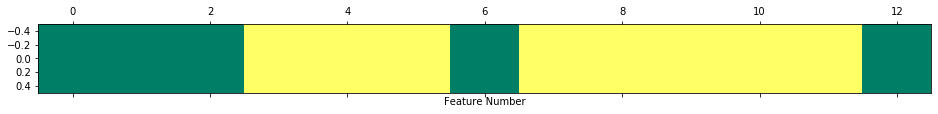

In [142]:
look = selector.get_support()
plt.matshow(look.reshape(1, -1), cmap='summer_r')
plt.xlabel("Feature Number")

In [141]:
# 의사 결정 트리로 최종 성능평가
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
X_train_sl = lin_selector.transform(X_train)
X_test_sl = lin_selector.transform(X_test)

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [538]:
# 전처리 파이프라인
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런은 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만든다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [539]:
# 수치형 특성을 위한 파이프라인
from sklearn.pipeline import Pipeline # 변환 파이프라인
from sklearn.preprocessing import StandardScaler # 특성 스케일링(표준화)
from sklearn.impute import SimpleImputer # 누락된 값 평균으로 채우기

imputer = SimpleImputer(strategy="median")

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["AGE", "DIS", "RM", "LSTAT", "NOX"])),
    ('std_scaler', StandardScaler()),
    ("imputer", SimpleImputer(strategy="median")),
])

In [545]:
boston_train_prepared = num_pipeline.fit_transform(train_set)
boston_train_prepared

array([[ 1.02801516, -0.80217296, -1.42806858,  1.75350503,  0.48925206],
       [-0.43119908,  0.32434893, -0.68008655, -0.5614742 , -0.15723342],
       [-1.6185989 ,  1.3306972 , -0.40206304, -0.65159505, -1.00872286],
       ...,
       [-1.38970255,  2.13089935,  0.45035421, -0.91069248, -1.03339138],
       [ 0.93144951, -0.79089788,  0.44188648,  1.52257036,  1.56105695],
       [ 0.602411  , -0.51371872,  0.12575823, -0.25731635, -0.31034841]])

In [546]:
len(boston_train_prepared)

404

In [547]:
boston_train_target = train_set["MEDV"]
boston_train_target

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [548]:
len(boston_train_target)

404

# 모델 선택 및 훈련
## 1. 선형 회귀

In [551]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(boston_train_prepared, boston_train_target)

# 테스트 데이터가 아닌 train 데이터에서 조금 가져오기
some_data = train_set.iloc[:5]
some_labels = boston_train_target.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print('예측: ', lin_reg.predict(some_data_prepared))
print('레이블: ', list(some_labels))

예측:  [10.1107571  22.49877378 23.42270197 15.63613688 20.68672351]
레이블:  [12.0, 19.9, 19.4, 13.4, 18.2]


In [556]:
some_data_prepared.shape

(5, 5)

In [566]:
# 회귀분석으로 예측
predictions = lin_reg.predict(np.array(boston_train_target).reshape(-1, 1))
predictions.shape
# plt.scatter(boston_train_prepared, predictions)
# plt.xlabel(u"real price")
# plt.ylabel(u"predict price")
# plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 1)

In [383]:
lin_reg.intercept_, lin_reg.coef_

(9.833896315799716,
 array([ -0.0151025 ,  -1.08086596,   5.27166235,  -0.64431526,
        -12.85683187]))

In [384]:
# 선형 회귀의 RMSE
from sklearn.metrics import mean_squared_error

boston_predictions_by_lin_reg = lin_reg.predict(boston_prepared)
lin_mse = mean_squared_error(boston_labels, boston_predictions_by_lin_reg)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.345037178581189

In [385]:
# 선형 회귀의 교차 검증으로 모델 평가
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, boston_prepared, boston_labels, cv=10)
lin_scores.mean()

0.6264371226462212

# 모델 훈련
## 2. 릿지 회귀

In [425]:
from sklearn.linear_model import Ridge

X = np.array(boston_prepared)
y = np.array(boston_labels)

# 하이퍼파라미터 alpha는 수동으로 설정
def ridge_by_alpha(alphas):
    df = pd.DataFrame()
    
    for alpha in alphas:
        ridge_reg = Ridge(alpha=alpha, solver="cholesky", random_state=42)
        ridge_reg.fit(X, y)
        
        column_name = 'Alpha = %f' % alpha
        
        df[column_name] = ridge_reg.coef_
    
    return df

ridge_by_alpha([a for a in np.arange(0, 10, 0.1)])

,Alpha = 0.000000,Alpha = 0.100000,Alpha = 0.200000,Alpha = 0.300000,Alpha = 0.400000,Alpha = 0.500000,Alpha = 0.600000,Alpha = 0.700000,Alpha = 0.800000,Alpha = 0.900000,...,Alpha = 9.000000,Alpha = 9.100000,Alpha = 9.200000,Alpha = 9.300000,Alpha = 9.400000,Alpha = 9.500000,Alpha = 9.600000,Alpha = 9.700000,Alpha = 9.800000,Alpha = 9.900000
0,-0.015103,-0.015696,-0.016229,-0.016709,-0.017143,-0.017538,-0.017897,-0.018227,-0.018529,-0.018807,...,-0.022804,-0.022800,-0.022795,-0.022789,-0.022784,-0.022778,-0.022772,-0.022766,-0.022759,-0.022753
1,-1.080866,-1.062306,-1.045576,-1.030418,-1.016619,-1.004003,-0.992424,-0.981758,-0.971901,-0.962763,...,-0.779005,-0.778384,-0.777773,-0.777172,-0.776580,-0.775997,-0.775423,-0.774857,-0.774301,-0.773752
2,5.271662,5.270702,5.269411,5.267838,5.266022,5.263996,5.261785,5.259414,5.256900,5.254261,...,4.960135,4.956456,4.952781,4.949110,4.945443,4.941780,4.938122,4.934467,4.930817,4.927171
3,-0.644315,-0.646861,-0.649185,-0.651318,-0.653287,-0.655112,-0.656811,-0.658399,-0.659889,-0.661292,...,-0.706020,-0.706354,-0.706686,-0.707017,-0.707347,-0.707674,-0.708001,-0.708326,-0.708649,-0.708971
4,-12.856832,-12.187668,-11.584758,-11.038724,-10.541882,-10.087869,-9.671378,-9.287939,-8.933770,-8.605642,...,-2.168832,-2.149026,-2.129580,-2.110483,-2.091726,-2.073300,-2.055197,-2.037408,-2.019924,-2.002739


In [431]:
ridge_reg = Ridge(alpha=0.05, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='cholesky', tol=0.001)

In [432]:
some_data = boston_train.iloc[:5]
some_labels = boston_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print('예측: ', ridge_reg.predict(some_data_prepared))
print('레이블: ', list(some_labels))

예측:  [28.97097332 25.18609517 32.78667687 31.70484167 30.817803  ]
레이블:  [12.0, 19.9, 19.4, 13.4, 18.2]


In [433]:
ridge_reg.intercept_, ridge_reg.coef_

(9.646349004838637,
 array([ -0.01540767,  -1.07133882,   5.27122669,  -0.645618  ,
        -12.51330419]))

In [434]:
# 릿지 회귀의 RMSE
from sklearn.metrics import mean_squared_error

boston_predictions_by_ridge_reg = ridge_reg.predict(X)
ridge_mse = mean_squared_error(y, boston_predictions_by_ridge_reg)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

5.345087080331747

In [447]:
# 릿지 회귀의 교차 검증으로 모델 평가
from sklearn.model_selection import cross_val_score

ridge_scores = cross_val_score(ridge_reg, X, y, cv=10)
ridge_scores.mean()

0.6264038916054858

# 모델 훈련
## 3. 라쏘 회귀

In [468]:
from sklearn.linear_model import Lasso

X0 = boston.data[:, 3:] # 주택당 방 수
y = boston.target

lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X0, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [469]:
some_data = boston_train.iloc[:5]
some_labels = boston_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print('예측: ', lasso_reg.predict(some_data_prepared))
print('레이블: ', list(some_labels))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 5)

In [464]:
lasso_reg.intercept_, lasso_reg.coef_

(3.958908023108833,
 array([-0.02273028, -0.67163328,  5.0264798 , -0.70585266, -0.        ]))

In [465]:
# 라쏘 회귀의 RMSE
from sklearn.metrics import mean_squared_error

boston_predictions_by_lasso_reg = lasso_reg.predict(X)
lasso_mse = mean_squared_error(y, boston_predictions_by_lasso_reg)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

5.417537081209245

In [466]:
# 라쏘 회귀의 교차 검증으로 모델 평가
from sklearn.model_selection import cross_val_score

lasso_scores = cross_val_score(lasso_reg, X, y, cv=10)
lasso_scores.mean()

0.6162256233749109

# 모델 훈련
## 4. 엘라스틱넷

In [460]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [461]:
elastic_net.intercept_, elastic_net.coef_

(20.035831004163818,
 array([-0.00323534, -0.52852382,  2.51592819, -0.87459198, -0.        ]))

In [378]:
# 5. 로지스틱 회귀

In [ ]:
# 6. 소프트맥스 회귀